Importing Libraries

In [27]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Flatten, Dense, Dropout 
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

loading MNIST data set

In [28]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

plotting a single Hand Written Digit

Text(0.5, 1.0, 'Class 5')

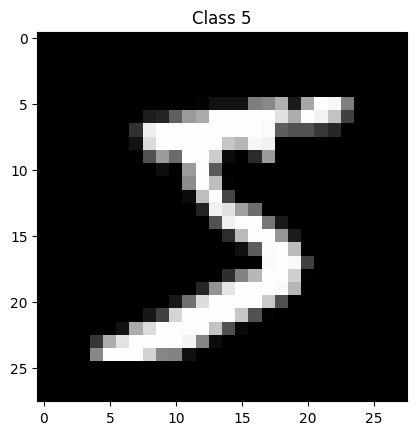

In [29]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

Normalizing the Data-set

In [30]:
features_train=X_train.reshape(X_train.shape[0],28,28,1)
features_test=X_test.reshape(X_test.shape[0],28,28,1)

In [31]:
features_train=features_train.astype('float32')/255
features_test=features_test.astype('float32')/255

In [32]:
targets_train = to_categorical(y_train, 10) 
targets_test = to_categorical(y_test, 10)

Building CNN model using BatchNormalization and Maxpooling with activation function of Relu

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())

c:\Users\Bharath Marupatla\OneDrive\Desktop\python_files\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

In [36]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [37]:
model.add(BatchNormalization())

In [38]:
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

In [39]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

In [40]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [41]:
model.add(MaxPooling2D(pool_size=(2,2)))

Flattening the outputs

In [42]:
model.add(Flatten())

In [43]:
model.add(BatchNormalization())

In [44]:
model.add(Dense(512)) 
model.add(Activation('relu'))
model.add(BatchNormalization())

Dropout regularization

In [45]:
model.add(Dropout(0.3)) 
model.add(Dense(10,activation="softmax"))

Compiling the model using Adam optimizer

In [46]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

Feature Engineering and Vaalidating with the built model

In [47]:
train_generator = ImageDataGenerator(rotation_range=7, width_shift_range=0.05, shear_range=0.2,height_shift_range=0.07, zoom_range=0.05)

In [48]:
test_generator = ImageDataGenerator()

In [49]:
train_generator = train_generator.flow(features_train, targets_train, batch_size=64)
test_generator = test_generator.flow(features_test, targets_test, batch_size=64)

Validating OF Testing

In [50]:
model.fit(train_generator, steps_per_epoch=60000//64, epochs=5, validation_data=test_generator, validation_steps=10000//64)

c:\Users\Bharath Marupatla\OneDrive\Desktop\python_files\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
936/937 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9192 - loss: 0.2651

c:\Users\Bharath Marupatla\OneDrive\Desktop\python_files\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 53s 49ms/step - accuracy: 0.9193 - loss: 0.2648 - val_accuracy: 0.9845 - val_loss: 0.0522
Epoch 2/5
  1/937 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - accuracy: 1.0000 - loss: 0.0192

c:\Users\Bharath Marupatla\OneDrive\Desktop\python_files\myenv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0192 - val_accuracy: 0.9842 - val_loss: 0.0531
Epoch 3/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.9824 - loss: 0.0572 - val_accuracy: 0.9918 - val_loss: 0.0270
Epoch 4/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9844 - loss: 0.0231 - val_accuracy: 0.9918 - val_loss: 0.0275
Epoch 5/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.9867 - loss: 0.0464 - val_accuracy: 0.9933 - val_loss: 0.0201
